#MANEJO ANALITICO DE DATOS, PARA UN MODELO LOGISTICO DE INVENTARIO DE UNA ENSAMBLADORA DE MOTOS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from datetime import datetime, timedelta
from scipy.stats import describe, pearsonr
import seaborn as sns
import matplotlib.pyplot as plt


#CREACION DE LA BASE DE DATOS ARTIFICIAL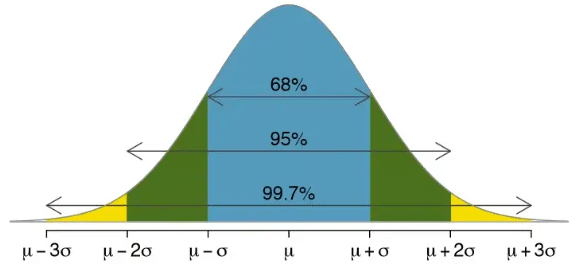

 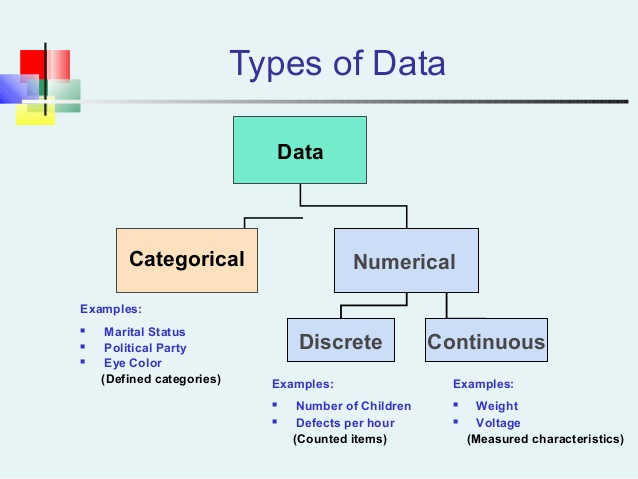

In [ ]:

# Crear DataFrame con valores nulos
data = {
    'Modelo': np.random.choice(['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4' , 'Modelo 5'], 1000),
    'Proveedores': np.random.choice(['Proveedor A', 'Proveedor B', 'Proveedor C'], 1000),
    'Problemas de inventario': np.random.choice(['Pérdida', 'Obsolescencia', 'Exceso', 'Falta'], 1000),
    'Movimiento de inventario': np.random.choice(['Entrada', 'Salida'], 1000),
    'Inventario_de_piezas': np.random.normal(100, 1000, 1000),
    'Órdenes_de_compra': np.random.normal(1000, 5000, 1000),
    'Costos_de_inventario': np.random.uniform(1000, 5000, 1000),
    'Rotación_de_inventario': np.random.uniform(1, 10, 1000),
    'Demandas_de_cliente': np.random.normal(50, 200, 1000),
    'Eficiencia_operativa': np.random.normal(1, 5, 1000)

}

df = pd.DataFrame(data)

# Agregar columna de fechas consecutivas
start_date = datetime.now().date()  # Fecha inicial (hoy)
date_range = [start_date + timedelta(days=i) for i in range(1000)]
df.insert(0, 'Fechas', date_range)  # Insertar la columna de fechas como la primera columna

# Introducir valores nulos en las columnas específicas
columns_with_nulls = ['Inventario_de_piezas', 'Órdenes_de_compra', 'Costos_de_inventario', 'Rotación_de_inventario', 'Demandas_de_cliente', 'Eficiencia_operativa']
for column in columns_with_nulls:
    null_indices = np.random.choice(df.index, size=100, replace=False)
    df.loc[null_indices, column] = np.nan

df.to_csv('/content/drive/MyDrive/CIENCIA DE DATOS/inventario.csv', index = False)




# GENERACION DE UNA MASCARA DE HUMO

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CIENCIA DE DATOS/inventario.csv')
#Mascara de humo
df_mask = pd.DataFrame()


#Generacion de mascara de humo para 2 columnas de control
df_mask['col1'] = df['Inventario_de_piezas']
df_mask['col2'] = df['Eficiencia_operativa']
df_mask['mascara1'] = df['Inventario_de_piezas'].isnull()
df_mask['mascara2'] = df['Eficiencia_operativa'].isnull()

In [ ]:
df

,Fechas,Modelo,Proveedores,Problemas de inventario,Movimiento de inventario,Inventario_de_piezas,Órdenes_de_compra,Costos_de_inventario,Rotación_de_inventario,Demandas_de_cliente,Eficiencia_operativa
0,2024-03-07,Modelo 4,Proveedor C,Falta,Salida,-1283.363002,4861.738529,3124.302372,8.013891,105.580604,2.991221
1,2024-03-08,Modelo 2,Proveedor A,Pérdida,Entrada,NaN,NaN,3099.942118,4.936479,NaN,2.367288
2,2024-03-09,Modelo 2,Proveedor C,Falta,Salida,-317.653095,-4482.279340,1404.517812,4.912527,-375.331419,-1.839999
3,2024-03-10,Modelo 3,Proveedor B,Pérdida,Entrada,944.474780,374.837867,3803.139225,1.028824,-343.101886,-2.540057
4,2024-03-11,Modelo 3,Proveedor C,Falta,Salida,423.404456,-810.269148,NaN,1.111444,242.816191,-2.696857
...,...,...,...,...,...,...,...,...,...,...,...
995,2026-11-27,Modelo 4,Proveedor C,Pérdida,Salida,-116.810938,8940.619699,4524.013413,NaN,479.256658,NaN
996,2026-11-28,Modelo 4,Proveedor C,Falta,Salida,-1546.456310,-2842.655504,2015.122792,5.435408,48.914879,0.621969
997,2026-11-29,Modelo 4,Proveedor C,Falta,Salida,NaN,2345.100096,2352.050337,9.431795,-141.776869,2.874315
998,2026-11-30,Modelo 1,Proveedor A,Exceso,Entrada,NaN,1023.672447,3416.293945,8.700107,-228.491692,6.259038


In [ ]:
df_mask

,col1,col2,mascara1,mascara2
0,-1283.363002,2.991221,False,False
1,NaN,2.367288,True,False
2,-317.653095,-1.839999,False,False
3,944.474780,-2.540057,False,False
4,423.404456,-2.696857,False,False
...,...,...,...,...
995,-116.810938,NaN,False,True
996,-1546.456310,0.621969,False,False
997,NaN,2.874315,True,False
998,NaN,6.259038,True,False


#IMPUTACION DE DATOS NULOS

#METODO DE IMPUTACION CON MEDIA

**Simplicidad**: Es fácil de implementar y entender, ya que implica calcular simplemente la media de los valores observados.

**Rápido**: El cálculo del promedio es computacionalmente más eficiente en comparación con otros métodos más complejos.

**Estabilidad**: Los valores imputados tienden a ser más estables y menos sensibles a fluctuaciones en los datos que algunos otros métodos.

**Menor riesgo de sobreajuste:** Al utilizar la media, se reduce el riesgo de sobreajuste, ya que no se introducen nuevas relaciones complejas entre variables.

In [ ]:
df3 = df.copy()

# Calcula el promedio de cada columna numérica
a = df3['Inventario_de_piezas'].mean()
b = df3['Eficiencia_operativa'].mean()
print(a)
print(b)
df_imputed_mean = pd.DataFrame()
df_imputed_mean['Inventario_de_piezas'] = df3['Inventario_de_piezas'].fillna(a)
df_imputed_mean['Eficiencia_operativa'] = df3['Eficiencia_operativa'].fillna(b)
df_imputed_mean['mask1'] = df_mask['mascara1']
df_imputed_mean['mask2'] = df_mask['mascara2']
df_imputed_mean

36.66559739317649
1.126268998217897


,Inventario_de_piezas,Eficiencia_operativa,mask1,mask2
0,-1283.363002,2.991221,False,False
1,36.665597,2.367288,True,False
2,-317.653095,-1.839999,False,False
3,944.474780,-2.540057,False,False
4,423.404456,-2.696857,False,False
...,...,...,...,...
995,-116.810938,1.126269,False,True
996,-1546.456310,0.621969,False,False
997,36.665597,2.874315,True,False
998,36.665597,6.259038,True,False


###GRAFICA DEMOSTRATIVA DE LOS VALORES IMPUTADOS

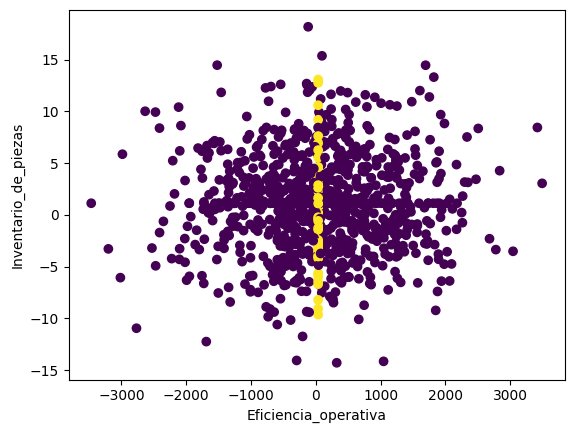

In [ ]:
import matplotlib.pyplot as plt

df_imputed_mean['mask1'] = df_mask['mascara1']
df_imputed_mean['mask2'] = df_mask['mascara2']




# Crea la gráfica de puntos
plt.scatter(df_imputed_mean['Inventario_de_piezas'], df_imputed_mean['Eficiencia_operativa'], c=df_imputed_mean['mask1'])
plt.xlabel('Eficiencia_operativa')
plt.ylabel('Inventario_de_piezas')
# Muestra la gráfica
plt.show()

##METODO KNN
La imputación de valores faltantes utilizando el algoritmo k-Nearest Neighbors (k-NN) tiene varias ventajas sobre la imputación basada en el promedio:

**Preservación de la estructura de los datos**: k-NN considera la similitud entre los registros para imputar los valores faltantes. Esto significa que los valores imputados están más relacionados con los valores observados en los datos, lo que ayuda a preservar mejor la estructura y la distribución de los datos originales.

**Consideración de la relación no lineal entre las variables**: k-NN puede capturar relaciones no lineales entre las variables, ya que no se limita a calcular simplemente la media de los valores observados. Esto es particularmente útil cuando los datos tienen relaciones complejas entre las variables.

**Robustez frente a valores atípicos:** k-NN es más robusto frente a valores atípicos en los datos que la imputación basada en el promedio. Los valores imputados se determinan en función de la proximidad de los vecinos más cercanos, lo que ayuda a mitigar el impacto de los valores atípicos en el proceso de imputación.

**Flexibilidad en la elección de características relevantes**: k-NN permite ajustar el número de vecinos (k) considerados para la imputación, lo que proporciona flexibilidad para adaptarse a diferentes características y distribuciones de los datos.




In [ ]:
print(df.columns)

Index(['Fechas', 'Modelo', 'Proveedores', 'Problemas de inventario',
       'Movimiento de inventario', 'Inventario_de_piezas', 'Órdenes_de_compra',
       'Costos_de_inventario', 'Rotación_de_inventario', 'Demandas_de_cliente',
       'Eficiencia_operativa'],
      dtype='object')


In [ ]:
df2 = df.copy()

columns_with_nulls = ['Inventario_de_piezas', 'Órdenes_de_compra', 'Costos_de_inventario', 'Rotación_de_inventario', 'Demandas_de_cliente', 'Eficiencia_operativa']
# Imputar valores nulos con el método KNN
def impute_missing_values_knn(df, columns):
    imputer = KNNImputer(n_neighbors=5)
    imputed_data = imputer.fit_transform(df[columns])
    df[columns] = imputed_data
    return df

# Imputar valores nulos utilizando KNN para las columnas específicas
df_imputed_knn = impute_missing_values_knn(df2, columns_with_nulls)
df_imputed_knn

,Fechas,Modelo,Proveedores,Problemas de inventario,Movimiento de inventario,Inventario_de_piezas,Órdenes_de_compra,Costos_de_inventario,Rotación_de_inventario,Demandas_de_cliente,Eficiencia_operativa
0,2024-03-07,Modelo 4,Proveedor C,Falta,Salida,-1283.363002,4861.738529,3124.302372,8.013891,105.580604,2.991221
1,2024-03-08,Modelo 2,Proveedor A,Pérdida,Entrada,-779.725296,-2162.342933,3099.942118,4.936479,17.186202,2.367288
2,2024-03-09,Modelo 2,Proveedor C,Falta,Salida,-317.653095,-4482.279340,1404.517812,4.912527,-375.331419,-1.839999
3,2024-03-10,Modelo 3,Proveedor B,Pérdida,Entrada,944.474780,374.837867,3803.139225,1.028824,-343.101886,-2.540057
4,2024-03-11,Modelo 3,Proveedor C,Falta,Salida,423.404456,-810.269148,2688.211812,1.111444,242.816191,-2.696857
...,...,...,...,...,...,...,...,...,...,...,...
995,2026-11-27,Modelo 4,Proveedor C,Pérdida,Salida,-116.810938,8940.619699,4524.013413,5.520801,479.256658,-3.575593
996,2026-11-28,Modelo 4,Proveedor C,Falta,Salida,-1546.456310,-2842.655504,2015.122792,5.435408,48.914879,0.621969
997,2026-11-29,Modelo 4,Proveedor C,Falta,Salida,656.428193,2345.100096,2352.050337,9.431795,-141.776869,2.874315
998,2026-11-30,Modelo 1,Proveedor A,Exceso,Entrada,782.021607,1023.672447,3416.293945,8.700107,-228.491692,6.259038


###GRAFICA DEMOSTRATIVA DE LOS VALORES IMPUTADOS

In [ ]:
df_imputed_knn.to_csv('/content/drive/MyDrive/CIENCIA DE DATOS/inventario_KNN.csv', index = False)

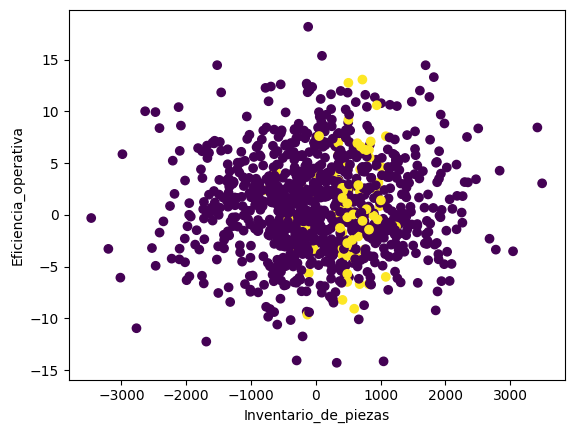

In [ ]:
import matplotlib.pyplot as plt

df_imputed_knn['mask1'] = df_mask['mascara1']
df_imputed_knn['mask2'] = df_mask['mascara2']

df_imputed_knn

# Mapea los valores de la columna 'condicion' a colores
colores = {'True': 'red','False': 'green'}

# Crea la gráfica de puntos
plt.scatter(df_imputed_knn['Inventario_de_piezas'], df_imputed_knn['Eficiencia_operativa'], c=df_imputed_knn['mask1'])
plt.xlabel('Inventario_de_piezas')
plt.ylabel('Eficiencia_operativa')
plt.show()
# Muestra la gráfica
plt.show()

In [ ]:
print(df_imputed_mean['Eficiencia_operativa'].mean())
print(df_imputed_knn['Eficiencia_operativa'].mean())

1.126268998217897
1.0356186777983372


# ANALISIS ESTADISTICO


## Estadística Descriptiva:

¿Cuál de los años se tubo el promedio mas alto de las ordenes de compra y la maxima orden de compra segun el modelo?

In [ ]:
print(df_imputed_knn['Fechas'].dtype)

object


In [ ]:
#Como vamos a trabajar con fechas toca asegurarse de que se este usando el formato datatime
#de lo contrario las funciones no daran efecto
df_std = df_imputed_knn.copy()
df_std['Fechas'] = pd.to_datetime(df['Fechas'])
print(df_std['Fechas'].dtype)

datetime64[ns]


PROMEDIO

    Año  Órdenes_de_compra
0  2024         583.494138
1  2025         599.235050
2  2026         514.162757


<ipython-input-27-d226720c0e17>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Año', y='Órdenes_de_compra', data=orders_stats ,palette='husl')


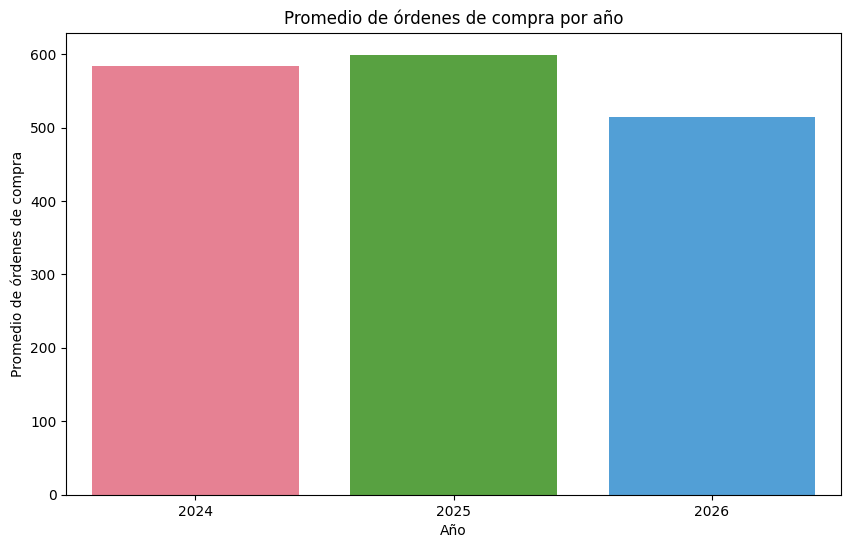

In [ ]:
df_std['Año'] = df_std['Fechas'].dt.year
orders_stats = df_std.groupby('Año')['Órdenes_de_compra'].mean().reset_index()
print(orders_stats)

# Gráfico de barras para el promedio de órdenes de compra por año
plt.figure(figsize=(10, 6))
sns.barplot(x='Año', y='Órdenes_de_compra', data=orders_stats ,palette='husl')
plt.title('Promedio de órdenes de compra por año')
plt.xlabel('Año')
plt.ylabel('Promedio de órdenes de compra')
plt.show()




MAXIMA ORDEN DE COMPRAS

     Año    Modelo  Órdenes_de_compra
0   2024  Modelo 1       13374.955999
1   2024  Modelo 2       14040.322386
2   2024  Modelo 3       11568.438803
3   2024  Modelo 4       12652.860177
4   2024  Modelo 5        8864.356693
5   2025  Modelo 1        9466.493659
6   2025  Modelo 2       14891.561542
7   2025  Modelo 3       11296.155786
8   2025  Modelo 4        7774.511697
9   2025  Modelo 5       12374.047868
10  2026  Modelo 1       13429.503174
11  2026  Modelo 2       11540.900740
12  2026  Modelo 3        8157.742567
13  2026  Modelo 4       12448.760050
14  2026  Modelo 5       13559.209792


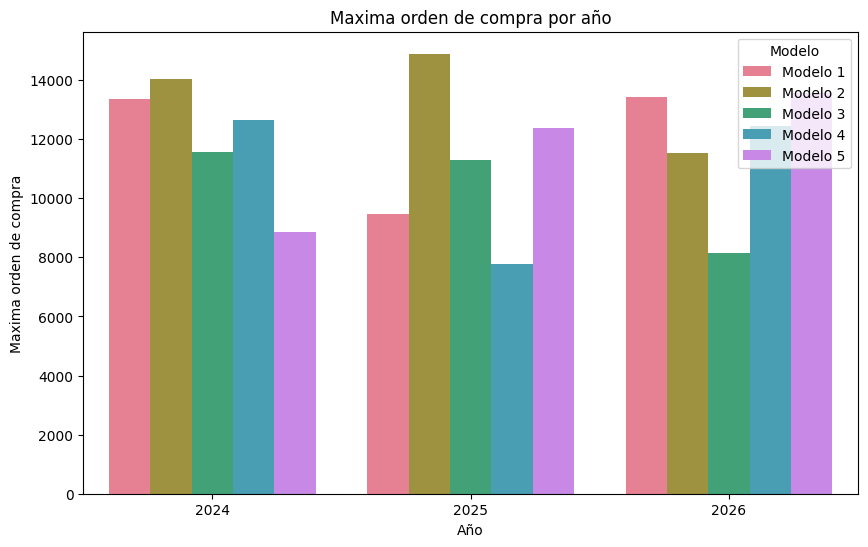

In [ ]:
df_std['Año'] = df_std['Fechas'].dt.year
orders_stats = df_std.groupby(['Año' , 'Modelo'])['Órdenes_de_compra'].max().reset_index()
print(orders_stats)


# Gráfico de barras para el promedio de órdenes de compra por año
plt.figure(figsize=(10, 6))
sns.barplot(x='Año', y='Órdenes_de_compra', hue = 'Modelo', data=orders_stats ,palette='husl')
plt.title('Maxima orden de compra por año')
plt.xlabel('Año')
plt.ylabel('Maxima orden de compra')
plt.show()


¿Cuál es el rango de valores de de eficiencia operativa para cada uno de los proveedores?


Rango de valores de eficiencia operativa para cada proveedor:
   Proveedores  Eficiencia_operativa
0  Proveedor A             32.458335
1  Proveedor B             29.513923
2  Proveedor C             26.204693


<ipython-input-15-cfca77d335ab>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Proveedores', y='Eficiencia_operativa', data= efficiency_range ,palette='husl')


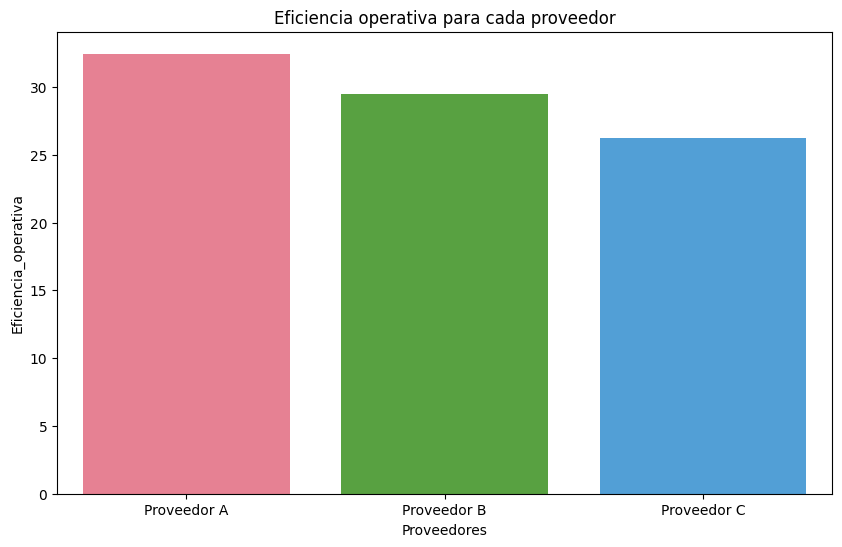

In [ ]:
# 2. ¿Cuál es el rango de valores de eficiencia operativa para cada uno de los proveedores?
efficiency_range = df_std.groupby('Proveedores')['Eficiencia_operativa'].apply(lambda x: x.max() - x.min()).reset_index()
print("\nRango de valores de eficiencia operativa para cada proveedor:")
print(efficiency_range)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Proveedores', y='Eficiencia_operativa', data= efficiency_range ,palette='husl')
plt.title('Eficiencia operativa para cada proveedor')
plt.xlabel('Proveedores')
plt.ylabel('Eficiencia_operativa')
plt.show()

## Estadística Inferencial:

¿Existe una correlación significativa entre las diferentes variables del conjunto de datos?

<ipython-input-16-60f4501a36b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_std.corr()



Matriz de correlación entre variables:
                        Inventario_de_piezas  Órdenes_de_compra  \
Inventario_de_piezas                1.000000           0.004220   
Órdenes_de_compra                   0.004220           1.000000   
Costos_de_inventario                0.026132           0.026407   
Rotación_de_inventario              0.006821           0.036865   
Demandas_de_cliente                -0.079636           0.061713   
Eficiencia_operativa                0.027222          -0.029873   
mask1                               0.138808           0.007792   
mask2                              -0.012427          -0.023165   
Año                                -0.026432          -0.006002   

                        Costos_de_inventario  Rotación_de_inventario  \
Inventario_de_piezas                0.026132                0.006821   
Órdenes_de_compra                   0.026407                0.036865   
Costos_de_inventario                1.000000               -0.033949   
R

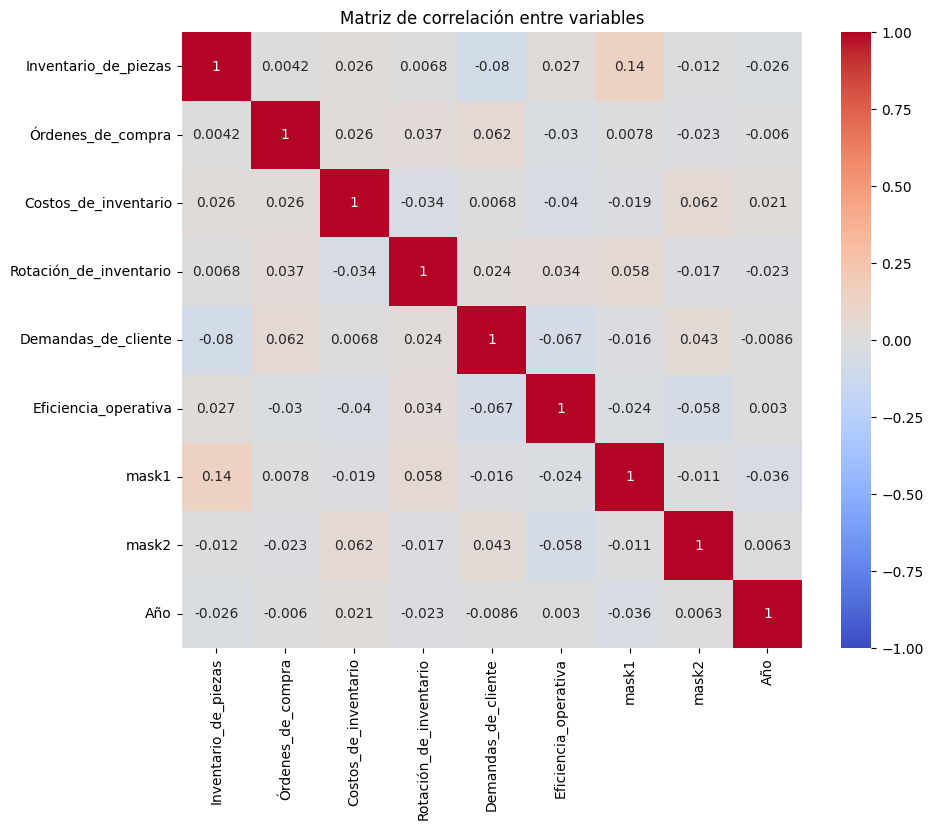

In [ ]:
correlation_matrix = df_std.corr()
print("\nMatriz de correlación entre variables:")
print(correlation_matrix)

# Mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación entre variables')
plt.show()

¿Se puede hacer alguna predicción o inferencia sobre una variable basada en las relaciones observadas en el conjunto de datos?

In [ ]:
# 5. ¿Se puede hacer alguna predicción o inferencia sobre una variable basada en las relaciones observadas en el conjunto de datos?
# Por ejemplo, podríamos intentar predecir la demanda de cliente en función de la rotación de inventario
correlation_demand_rotation = pearsonr(df_std['Demandas_de_cliente'], df_std['Rotación_de_inventario'])
print("\nCorrelación entre la demanda de cliente y la rotación de inventario:")
print("Coeficiente de correlación:", correlation_demand_rotation[0])
print("Valor p:", correlation_demand_rotation[1])




Correlación entre la demanda de cliente y la rotación de inventario:
Coeficiente de correlación: 0.02359646059080746
Valor p: 0.45605646877967876


#CALCULO DE INDICADORES DE EFICIENCIA

## Porcentaje de inventario disponible

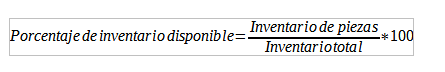

In [ ]:
df_std['Año'] = df_std['Fechas'].dt.year
df_std['Mes'] = df_std['Fechas'].dt.month

inventario_disponible = df_std.groupby(['Año','Modelo'])['Inventario_de_piezas'].sum()
porcentaje_inventario_disponible = (inventario_disponible / df_std['Inventario_de_piezas'].sum()) * 100
porcentaje_inventario_disponible

Año   Modelo  
2024  Modelo 1     6.354094
      Modelo 2    13.624391
      Modelo 3    17.167613
      Modelo 4     2.065890
      Modelo 5    -2.382890
2025  Modelo 1    20.767247
      Modelo 2    13.901938
      Modelo 3    14.503035
      Modelo 4     7.415084
      Modelo 5    -8.450482
2026  Modelo 1     5.962712
      Modelo 2     2.266956
      Modelo 3    -4.914407
      Modelo 4    -1.873053
      Modelo 5    13.591873
Name: Inventario_de_piezas, dtype: float64

## Rotación de inventario

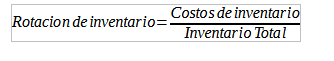

In [ ]:
# Suponiendo que tienes un DataFrame llamado 'df' con la columna 'Rotación de inventario'
Costo =df_std.groupby(['Año','Modelo'])['Costos_de_inventario'].sum()
Rotación_de_inventario = Costo / df_std['Inventario_de_piezas'].sum()
Rotación_de_inventario


Año   Modelo  
2024  Modelo 1    1.975040
      Modelo 2    2.668777
      Modelo 3    2.354870
      Modelo 4    2.071888
      Modelo 5    1.771540
2025  Modelo 1    2.871398
      Modelo 2    2.638923
      Modelo 3    2.520282
      Modelo 4    2.681041
      Modelo 5    2.515001
2026  Modelo 1    2.559156
      Modelo 2    2.148279
      Modelo 3    2.529972
      Modelo 4    2.805660
      Modelo 5    2.301090
Name: Costos_de_inventario, dtype: float64

## Eficiencia operativa

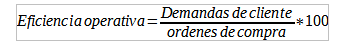

In [ ]:
Demanda =df_std.groupby(['Año','Modelo'])['Demandas_de_cliente'].sum()
Eficiencia_operativa = (Demanda / df_std['Órdenes_de_compra'].sum())* 100
Eficiencia_operativa

Año   Modelo  
2024  Modelo 1    0.330695
      Modelo 2    0.669184
      Modelo 3    0.454137
      Modelo 4    0.422347
      Modelo 5    0.454947
2025  Modelo 1    0.763640
      Modelo 2    1.284460
      Modelo 3    0.838873
      Modelo 4    0.398616
      Modelo 5    0.752057
2026  Modelo 1    0.826762
      Modelo 2    0.179847
      Modelo 3   -0.039255
      Modelo 4    0.783739
      Modelo 5    0.651878
Name: Demandas_de_cliente, dtype: float64

##Proporción de movimientos de inventario por proveedor

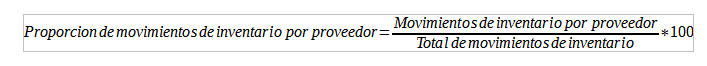

In [ ]:
df_std['Año'] = df_std['Fechas'].dt.year
df_std['Mes'] = df_std['Fechas'].dt.month


# Suponiendo que tienes un DataFrame llamado 'df' con las columnas 'Movimiento de inventario' y 'Proveedores'
movimientos_por_proveedor = df_std.groupby(['Año' , 'Modelo'])['Movimiento de inventario'].count()
total_movimientos = df['Movimiento de inventario'].count()
movimientos_por_proveedor = (movimientos_por_proveedor / total_movimientos)*100
movimientos_por_proveedor

Año   Modelo  
2024  Modelo 1    5.5
      Modelo 2    7.2
      Modelo 3    6.2
      Modelo 4    5.6
      Modelo 5    5.5
2025  Modelo 1    7.6
      Modelo 2    7.8
      Modelo 3    7.2
      Modelo 4    7.1
      Modelo 5    6.8
2026  Modelo 1    7.0
      Modelo 2    5.8
      Modelo 3    6.8
      Modelo 4    7.3
      Modelo 5    6.6
Name: Movimiento de inventario, dtype: float64

# Proporción de problemas de inventario

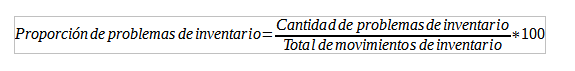

In [ ]:
# Suponiendo que tienes un DataFrame llamado 'df' con las columnas 'Movimiento de inventario' y 'Proveedores'
Problemas = df_std.groupby(['Año' , 'Proveedores'])['Problemas de inventario'].count()
total_movimientos = df['Movimiento de inventario'].count()
P_inventario = (Problemas / total_movimientos)*100
P_inventario

Año   Proveedores
2024  Proveedor A     9.8
      Proveedor B    10.6
      Proveedor C     9.6
2025  Proveedor A    11.6
      Proveedor B    12.4
      Proveedor C    12.5
2026  Proveedor A    10.6
      Proveedor B    12.0
      Proveedor C    10.9
Name: Problemas de inventario, dtype: float64

In [ ]:
df.columns

Index(['Fechas', 'Modelo', 'Proveedores', 'Problemas de inventario',
       'Movimiento de inventario', 'Inventario_de_piezas', 'Órdenes_de_compra',
       'Costos_de_inventario', 'Rotación_de_inventario', 'Demandas_de_cliente',
       'Eficiencia_operativa'],
      dtype='object')